<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Neural_Network_classification_pytorch(Multiclass_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
###working on Multiclass classification problem:

In [63]:
#creating of toy multiclass Dataset:

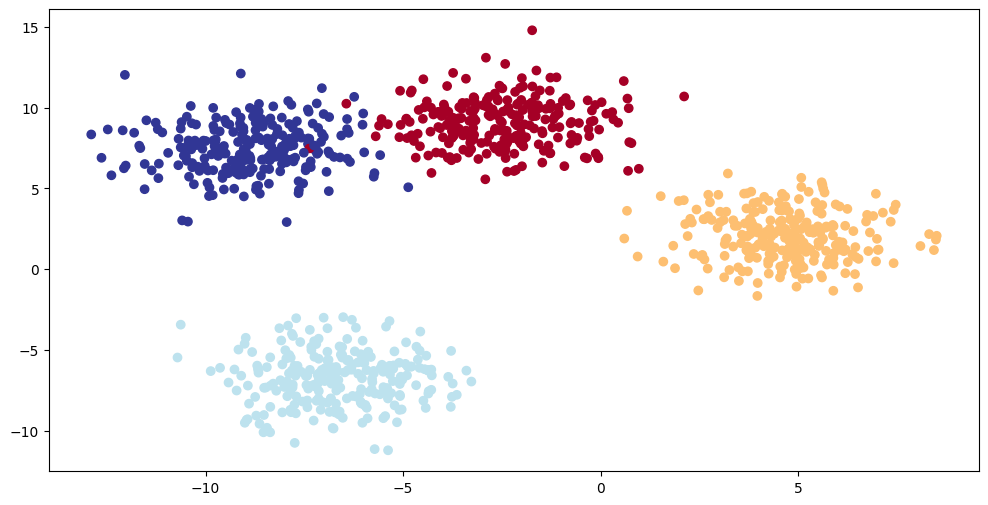

In [64]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Setting our hyperparameters:
NUM_CLASS=4
NUM_FEARTURES=2
RANDOM_SEED=42

#CREATING THE DATASET
x_blob,y_blob=make_blobs(n_samples=1000,
                  cluster_std=1.5,
                  centers=NUM_CLASS,
                  random_state=RANDOM_SEED,
                  n_features=NUM_FEARTURES)

#turning dataset to tensor:
x_blob=torch.from_numpy(x_blob).type(torch.float32)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#splitting the data:
x_train_blob,x_test_blob,y_train_blob,y_test_blob=train_test_split(x_blob,
                                                                   y_blob,
                                                                   test_size=0.2,
                                                                   random_state=42)

#plotting the data:
plt.figure(figsize=(12,6))
plt.scatter(x_blob[:,0],x_blob[:,1],cmap=plt.cm.RdYlBu,c=y_blob)

###Creating Our MultiClass Classification model:

In [65]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [66]:
x_train_blob=x_train_blob.to(device)
y_train_blob=y_train_blob.to(device)
x_test_blob=x_test_blob.to(device)
y_test_blob=y_test_blob.to(device)

In [67]:
print(x_train_blob.device)
print(y_train_blob.device)
print(x_test_blob.device)
print(y_test_blob.device)

cpu
cpu
cpu
cpu


In [68]:
from torch import nn
class multiclass_model(nn.Module):
  def __init__(self,input_features,output_features,hidden_layer=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_layer),
        nn.ReLU(), #can work without this as our dataset is linearly seperable...
        nn.Linear(in_features=hidden_layer,out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer,out_features=output_features)
    ).to(device)
  def forward(self,x):
    return self.linear_layer_stack(x)

model=multiclass_model(input_features=2,
                       output_features=4,
                       hidden_layer=8)

model


multiclass_model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [69]:
##loss fuction(cost fuction or criterion) and optimizer for multiclass classification model:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

In [70]:

#Accuracy is how many predictions your model got correct, out of all the predictions it made.#not suitable for imbalance datasets:
def Accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc


###Getting prediction probabilities for our Multiclass classification model:

In [71]:
#logits->multiclass probabilities->muticlass labels:

#logits:
model.eval()
with torch.inference_mode():
  y_logits=model(x_train_blob.to(device))

y_logits[:10]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923],
        [-0.2044, -1.1380, -0.9468, -0.3093],
        [-0.2613, -1.2852, -1.0251, -0.2935],
        [-0.5237, -0.5791, -1.1276, -0.8689],
        [-0.0423, -0.8228, -0.4666, -0.0986],
        [-0.1876, -1.1245, -0.8498, -0.2406]])

In [72]:
#logits to prediction probabilities:
y_pred_probs=torch.softmax(y_logits,dim=1)
#prediction probabiliaties to prediction labels:
y_pred_label=torch.argmax(y_pred_probs,dim=1).type(torch.float32)
y_pred_label[:10]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

###Creating training and testing Loop for our MultiClass Classification model:


In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=150

for epoch in range(epochs):
  model.train()
  y_logits=model(x_train_blob)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train_blob)
  acc=Accuracy_fn(y_true=y_train_blob,
                  y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits=model(x_test_blob)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test_blob)
    test_acc=Accuracy_fn(y_true=y_test_blob,
                  y_pred=test_pred)

  if epoch%10==0:
     print(f"Epoch: {epoch},Training Loss: {loss:.5f},Training Accuracy:{acc:.2f}%,Testing Loss: {test_loss:.5f},Test Accuracy: {test_acc:.2f}%")


Epoch: 0,Training Loss: 1.15883,Training Accuracy:40.38%,Testing Loss: 1.07554,Test Accuracy: 48.00%
Epoch: 10,Training Loss: 0.64476,Training Accuracy:96.75%,Testing Loss: 0.66069,Test Accuracy: 97.50%
Epoch: 20,Training Loss: 0.42535,Training Accuracy:98.50%,Testing Loss: 0.43074,Test Accuracy: 100.00%
Epoch: 30,Training Loss: 0.25294,Training Accuracy:99.12%,Testing Loss: 0.24508,Test Accuracy: 99.50%
Epoch: 40,Training Loss: 0.11232,Training Accuracy:99.25%,Testing Loss: 0.10229,Test Accuracy: 99.50%
Epoch: 50,Training Loss: 0.06627,Training Accuracy:99.25%,Testing Loss: 0.05848,Test Accuracy: 99.50%
Epoch: 60,Training Loss: 0.05068,Training Accuracy:99.25%,Testing Loss: 0.04293,Test Accuracy: 99.50%
Epoch: 70,Training Loss: 0.04300,Training Accuracy:99.25%,Testing Loss: 0.03491,Test Accuracy: 99.50%
Epoch: 80,Training Loss: 0.03836,Training Accuracy:99.25%,Testing Loss: 0.02988,Test Accuracy: 99.50%
Epoch: 90,Training Loss: 0.03525,Training Accuracy:99.25%,Testing Loss: 0.02663,Te

In [74]:
#visualization:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


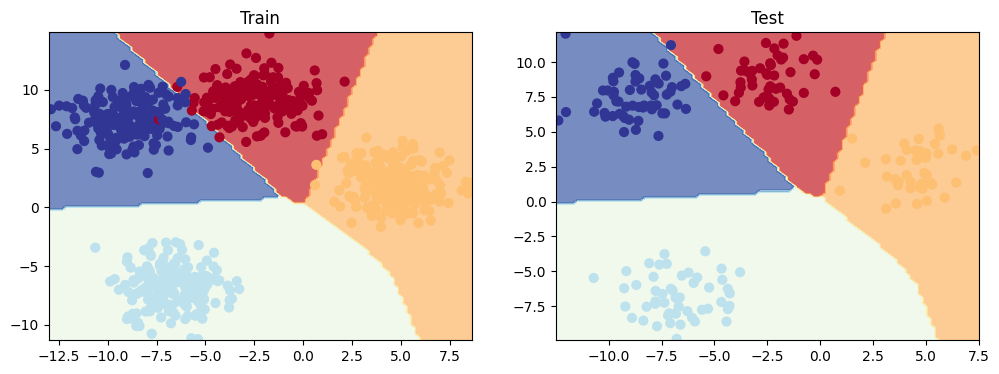

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,x_train_blob,y_train_blob)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,x_test_blob,y_test_blob)

###Some more Evaluation matrics for our model:

| Metric    | Formula                        | Helpful functions                                                 | Interpretation                                       |
| --------- | ------------------------------ | ----------------------------------------------------------------- | ---------------------------------------------------- |
| Precision | **Precision = tp / (tp + fp)** | `torchmetrics.Precision()`<br>`sklearn.metrics.precision_score()` | Higher precision leads to fewer **false positives**. |
| Recall    | **Recall = tp / (tp + fn)**    | `torchmetrics.Recall()`<br>`sklearn.metrics.recall_score()`       | Higher recall leads to fewer **false negatives**.    |


To balance both, we often use the F1 Score:

F1 Score
=
2
(⋅
precision
⋅
recall/
(precision
+
recall))



In [ ]:
pip install torchmetrics

In [77]:
print(y_pred_label.shape)
print(y_test_blob.shape)

torch.Size([800])
torch.Size([200])


In [81]:
from torchmetrics import Accuracy

# Step 1: Accuracy setup with correct task and num_classes
acc_metric = Accuracy(task='multiclass', num_classes=4)

# Step 2: Compute accuracy
acc = acc_metric(y_test_blob,test_pred)
print(f"Accuracy: {acc.item()*100:.2f}%")


Accuracy: 99.50%


In [84]:
from torchmetrics import Precision

prec_metric = Precision(
    task='multiclass',
    num_classes=4,
    average='macro'    # change if you need a different averaging scheme
).to(device)

precision = prec_metric(test_pred, y_test_blob)
print(f"Macro‑averaged precision: {precision.item():.4f}")

Macro‑averaged precision: 0.9950


In [85]:
from torchmetrics import Recall

recall_metric = Recall(
    task='multiclass',
    num_classes=4,
    average='macro'   # options: 'macro', 'micro', 'weighted', 'none'
).to(device)

# --- 5. Compute Recall ---
recall = recall_metric(test_pred, y_test_blob)
print(f"Macro-averaged Recall: {recall.item():.4f}")

Macro-averaged Recall: 0.9956


In [86]:
from torchmetrics import F1Score

f1_metric = F1Score(
    task='multiclass',
    num_classes=4,
    average='macro'   # or 'micro', 'weighted', 'none'
).to(device)

# 5. Compute F1 Score
f1 = f1_metric(test_pred, y_test_blob)
print(f"Macro-averaged F1 Score: {f1.item():.4f}")

Macro-averaged F1 Score: 0.9953
